

# Palmer Penguins Machine Learning Project

#### Background
An important task in the ecology of the Antarctic is to catalog the many different species of penguins in that area. Determining the species of a penguin often requires a combination of biological expertise and many precise measurements, which can be difficult to obtain.

In the dystopian future, there are too many penguins. Because there are so many, we can’t take many detailed measurements on all of them! In order to classify the species of penguins in large volume, we need to figure out which measurements are most important for distinguishing penguin species.






# Data Import and Some Cleaning



In [133]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd


#Read in the data
penguins = pd.read_csv("palmer_penguins.csv")
penguins = penguins[penguins['Sex'] != '.'] 
penguins["Species"] = penguins["Species"].str.split().str.get(0)


penguins.head()



,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


Here we can observe the head of the data (first five rows), and we can see that the data consists of both many quantitative and qualitative features about the penguins. We have also gone ahead and replaced the species name in the data frame to shorten it for the sake of convenience and readability. As we go through the notebook, we will notice that some parts of the data are not necessarily that important to us but some are. Some values are NaN and some of the data in some column categories is not reported properly. We will remedy this by cleaning the data in a later section.

# Exploratory Analysis


### Table 

In [4]:
def displayTable(df,groups,vals):
    """
    
      The function takes in a dataframe, a list a groups you want to group by in order, and then a list of 
      what you want to calculate and then 
      displays a table by grouping the data to make it more readable
      It then computes the mean and standard deviation of each variable
      """
    return df.groupby(groups)[vals].aggregate([np.mean,np.std]).round(3)

displayTable(penguins,["Species", "Island","Sex"],["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)",
 "Delta 15 N (o/oo)"])


Culmen Length (mm)        Culmen Depth (mm)         \
                                         mean    std              mean    std   
Species   Island    Sex                                                         
Adelie    Biscoe    FEMALE             37.359  1.762            17.705  1.091   
                    MALE               40.591  2.007            19.036  0.880   
          Dream     FEMALE             36.911  2.089            17.619  0.897   
                    MALE               40.071  1.748            18.839  1.033   
          Torgersen FEMALE             37.554  2.208            17.550  0.880   
                    MALE               40.587  3.027            19.391  1.082   
Chinstrap Dream     FEMALE             46.574  3.109            17.588  0.781   
                    MALE               51.094  1.565            19.253  0.761   
Gentoo    Biscoe    FEMALE             45.564  2.051            14.238  0.540   
                    MALE               49.474  2.721            15.718  0.741   

                           Flipper Length (mm)        Body Mass (g)           \
                                          mean    std          mean      std   
Species   Island    Sex                                                        
Adelie    Biscoe    FEMALE             187.182  6.745      3369.318  343.471   
                    MALE               190.409  6.464      4050.000  355.568   
          Dream     FEMALE             187.852  5.510      3344.444  212.056   
                    MALE               191.929  6.804      4045.536  330.548   
          Torgersen FEMALE             188.292  4.639      3395.833  259.144   
                    MALE               194.913  5.915      4034.783  372.472   
Chinstrap Dream     FEMALE             191.735  5.754      3527.206  285.334   
                    MALE               199.912  5.977      3938.971  362.138   
Gentoo    Biscoe    FEMALE             212.707  3.898      4679.741  281.578   
                    MALE               221.541  5.673      5484.836  313.159   

                           Delta 15 N (o/oo)         
                                        mean    std  
Species   Island    Sex                              
Adelie    Biscoe    FEMALE             8.774  0.399  
                    MALE               8.873  0.368  
          Dream     FEMALE             8.915  0.503  
                    MALE               8.984  0.321  
          Torgersen FEMALE             8.663  0.495  
                    MALE               8.920  0.409  
Chinstrap Dream     FEMALE             9.251  0.322  
                    MALE               9.465  0.387  
Gentoo    Biscoe    FEMALE             8.193  0.279  
                    MALE               8.303  0.245

We have made a table with all of the mean values and the standard deviation for each quantitative variable for each species of penguin. We thought it would be helpful to make a list of all the different factors that affect each species.

###### Observations:
We can observe that, on average the different sizes of the penguins vary a little bit. The differences in Culmen Length (mm) and Culmen Depth (mm) between the different species may be more obvious. Male and female species of each penguin are also very different in almost every way that you can measure them. Male penguins on average, carry larger measurement values than female penguins.

### Scatterplot

In [5]:
def DisplayScatter(df,x,y1,y2):
    '''
    Takes in a dataframe, a value for x and then two values for y to make a figure with 2 axes that contain 2 
    scatter plots.
    '''
    t1=x+" vs "+y1#creates a title for plot 1
    fig,ax=plt.subplots(2,figsize = (20, 20)) #initializes a figure
    ax[0].set(title =t1,
    xlabel = x,
    ylabel = y1)#plots stuff in first plot
    
    
    t2=x+" vs "+y2#creates a title for plot 2
    ax[1].set(title =t2,
    xlabel = x,
    ylabel = y2)#plots stuff in second plot

    species=set(penguins["Species"])#creates a unique collection(set) of the 3 species 
    for s in species:
        #for each species plot x vs y1, each species will be in a different color
        tempDf=penguins[penguins["Species"]==s]#all penguins such that penguins are the current specie under consideration
        ax[0].scatter(tempDf[x],tempDf[y1],label=s.split()[0])
    ax[0].legend()
    #for each species plot x vs y2, each species will be in a different color
    for s in species:
        tempDf=penguins[penguins["Species"]==s]#
        ax[1].scatter(tempDf[x],tempDf[y2],label=s.split()[0])
    ax[1].legend()
            



    

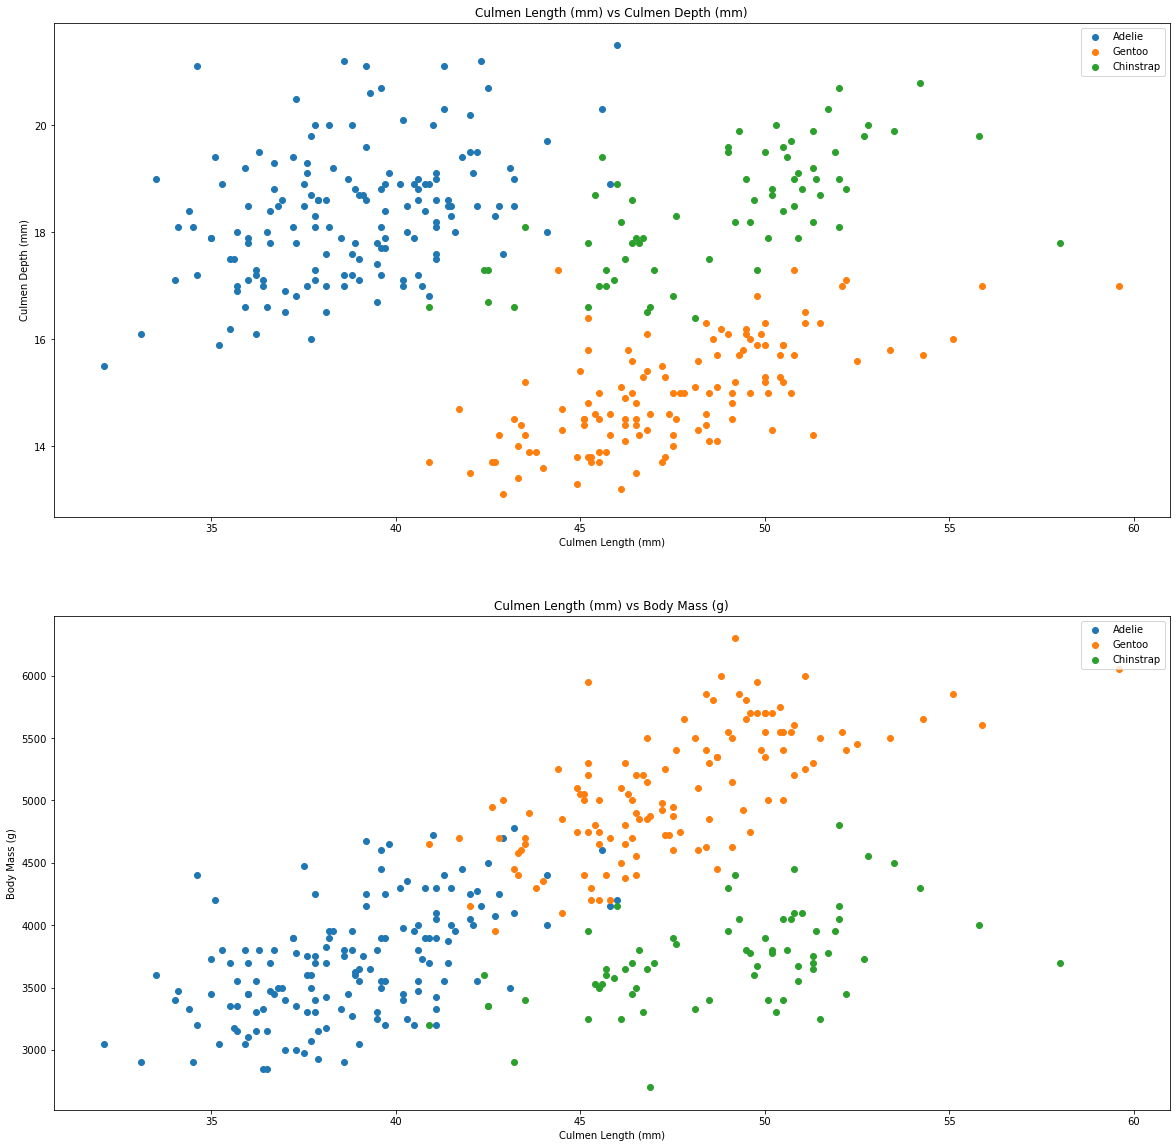

In [6]:
DisplayScatter(penguins,"Culmen Length (mm)","Culmen Depth (mm)","Body Mass (g)")

In the first plot, we can see that the different penguin species, which can be told apart by their colors, seem to be different enough to form groups of data based on their Culmen Depth and Culmen Length. Culmen length vs. Body mass also created clusters, though they seemed to be a little less connected than Culmen depth vs. Culmen length. As the legend says, the clusters are mostly made up of each specific species. Based on the first plot, we will probably pay closer attention to Culmen length and Culmen depth as our quantitative variables when choosing and modeling our features.

### Histogram

In [38]:
def DisplayHistogram(df=penguins,category1="Species",category2="None",toPlot="Delta 15 N (o/oo)"):
    
    '''
    Takes in a dataframe, a categorical variable, another optional categorical variable along with what should
    be plotted(what you are finding the frequency of) and makes a histogram
    
    
    '''
    fig,ax=plt.subplots(1,figsize = (15, 9))#creates a figure
    c1=set(penguins[category1])
    if(category2!="None"):#if the second category is not none(defualt value), then do a second grouping by island
        c2=set(penguins["Island"])
    else:
        for s in c1:#if it is none, then just do a plot with one categorical variable and return
            tempDf=penguins[(penguins[category1]==s)]
            ax.hist(tempDf[toPlot],alpha=.5,label=s.split()[0])#plot a histogram
            ax.set(title = toPlot+" by "+category1,
       xlabel = toPlot,
       ylabel = "Frequency")
            ax.legend()#add a legend
        return
            
        
    for s in c1:#isolate and plot only those that are the current category1 and category 2
        for i in c2:
            tempDf=penguins[(penguins[category1]==s) & (penguins[category2]==i)]
            ax.hist(tempDf[toPlot],alpha=.5,label=s.split()[0]+", "+i)#plot a histogram
    
    ax.legend()#add a legend
    ax.set(title = toPlot+" by "+category1,
       xlabel = toPlot,
       ylabel = "Frequency")
    





(150.0, 250.0)

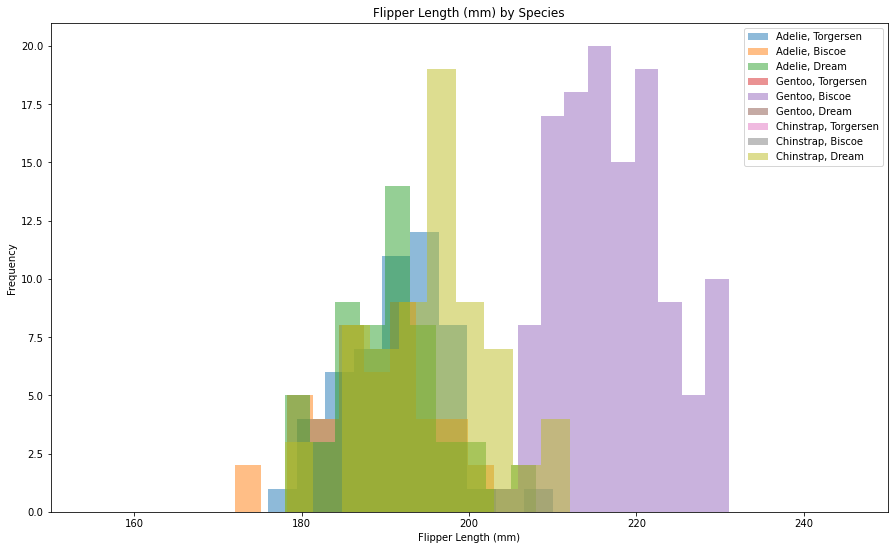

In [40]:
DisplayHistogram(df=penguins,category1="Species",category2="Island",toPlot="Flipper Length (mm)")
plt.xlim([150, 250])

The distribution of body mass for each penguin species and island appears to be roughly bimodel. The Gentoo penguions on Biscoe seem to have their own range of flipper lengths. There seems to be a great deal of overlap between the 2 categroical variables selected(island, species), so flipper length may not be one of the best features to utilize in our feature selection, but it is still worth exploring and considering as it created some disinction between the species.

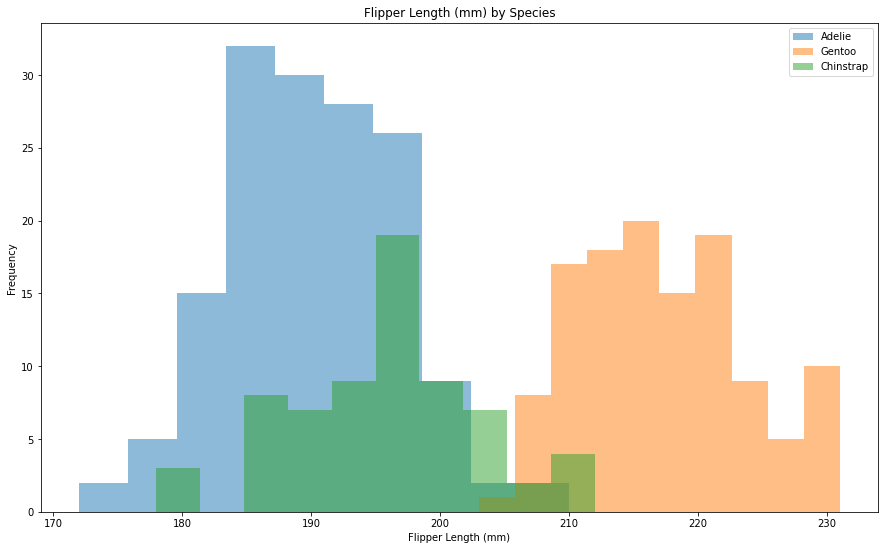

In [41]:
DisplayHistogram(df=penguins,category1="Species",category2="None",toPlot="Flipper Length (mm)")

This plot is the same as the plot above except instead of two cagtegorical variables we just use one. We did this to make the data a little easier to inspect in histogram format and to maybe observe any trends. Like the plot above though, on average, the flipper lengths seem to overlap a great deal and it is a little difficult to observe and distincitons.

Observations we made from this plot were that Adelie penguins  have a high frequency of flipper lengths of about 185 mm and Chinstrap penguins overlap with Adelie penguins a great deal.

### Boxplot

[Text(0.5, 1.0, 'Body Mass By Species and Sex')]

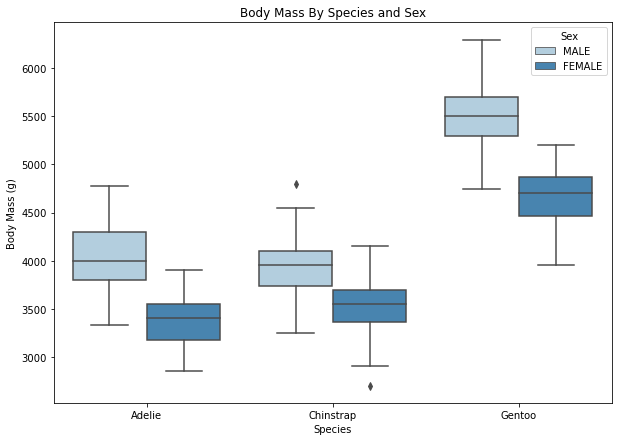

In [42]:
import seaborn as sns
fig, ax = plt.subplots(1, figsize = (10, 7))
ax = sns.boxplot(x="Species", y="Body Mass (g)", hue = "Sex", data=penguins, palette ="Blues")
ax.set(title = "Body Mass By Species and Sex")

#plots a box plot of each sex and of each species. Each plot describes the spread and center of the body
#mass of each penguin


First, more changes had to be made to the data. Some of the penguins did not have a measurement for Sex, so they had to be taken out of this box plot. Now we'll talk about what we saw. The first thought was on the mark. The range and interquartile range of each penguin species' weights are very different from one another.

Also, the last graph shows that Gentoo's are by far the heaviest. Both Adelie and Chinstrap penguins stay in about the same area. This makes sense based on what we saw in the histogram.

# Feature Selection

### Cleaning/Preparing the Data

In [11]:
from sklearn.model_selection import train_test_split
np.random.seed(21487)
train, test = train_test_split(penguins, test_size = 0.2,random_state=33) # 20% of the dataset will be held as a test set


In [111]:
from sklearn import preprocessing
def prepare_penguin_data(df):
    '''
    
    This function takes in a dataframe and cleans up the data by only using the columns we want, 
    It  encodes the categorical columns we want into numbers , and getting rid of more columns.
    
    
    '''
    df = df.copy()
    
    le = preprocessing.LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])#encode into a "binary" fashion
    df["Species"] = le.fit_transform(df["Species"])#encode into a "trinary" fashion
    df["Island"] = le.fit_transform(df["Island"])#encode into a "trinary" fashion
    df["Region"] = le.fit_transform(df["Region"])

    
    
    #Drop any cols that serve no purpose to us
    df = df.drop(['studyName', 'Sample Number', 'Stage', 'Individual ID', 'Comments', 'Date Egg', 'Clutch Completion'], axis = 1)
    df = df.dropna()#drop portions that contain na, this data is considered invalid to us
    X = df.drop(['Species'], axis = 1)#this is what we are trying to predict, so get rid of species 
    y = df['Species'] #this is our target variable
    
    return(X, y)

In [113]:
X_train, y_train = prepare_penguin_data(train)#create training data
X_test, y_test = prepare_penguin_data(test)#create test data

### Cross-Validation Feature Selection

This is a way of systematic feature selection. We will run a k-fold cross validation test on our data with all the lists in the combinations lists and see which one has the highest average score. Which ever combination has the highest average score will be the combination we will use.

In [14]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import tree, preprocessing
from sklearn.ensemble import RandomForestClassifier

combinations = [['Sex', 'Flipper Length (mm)', 'Body Mass (g)'],
 ['Sex','Culmen Length (mm)', 'Culmen Depth (mm)'],
 ['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
 ['Island', 'Flipper Length (mm)', 'Body Mass (g)'],
 ['Island', 'Body Mass (g)','Culmen Depth (mm)'],
 ['Sex','Island','Body Mass (g)']]#this is a list of all the possible combinations of 3 features

def checkScore(model,col):
    '''
    Runs a k-fold cross-validation and 
    returns the mean of scores produced by each step
    '''
    return cross_val_score(model, X_train[col], y_train, cv = 5).mean()
    









In [45]:
MLR=LogisticRegression(multi_class='multinomial',C=1.5,max_iter=1000)#this is the base model we will use
D={}#a dictionary that stores the cv score as a key and the corresponding combination as a value

for c in combinations:
    D[checkScore(MLR,c)]=c
Score,Features=max(D),D[max(D)]#gets the maximum score of each combination
print(Score,Features)
D

0.9808417997097243 ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']


{0.7149492017416545: ['Sex', 'Flipper Length (mm)', 'Body Mass (g)'],
 0.9808417997097243: ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
 0.97322206095791: ['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
 0.6842525399129172: ['Island', 'Flipper Length (mm)', 'Body Mass (g)'],
 0.7795355587808418: ['Island', 'Body Mass (g)', 'Culmen Depth (mm)'],
 0.7189404934687953: ['Sex', 'Island', 'Body Mass (g)']}

The highest cross validation score with the qualitative variable "Sex" and the two quantitative variables "Culmen Length (mm)" and "Culmen Depth (mm)" is .9808417997097243. We chose these three variables for our machine learning models because they produce the highest cross validation score. This makes sense because as we saw in our exploratory analysis, Culmen length and Culmen depth provided a good visual distinction between the three species. "Island" would also be a viable option for our qualitative variable. As we saw in our visualizations, "Island" also contributed to that visual difference, and it also has a high CV score, but we will continue to use "Sex" for the sake of simplicity. Now, since we used a MLR model as our base model, that could affect the features that could be used, but for the most part it would affect it very minimally and should not really matter. The features we have found are on average, the most representative.


# Modeling

### Function/Imports for Plotting Decsion Regions and Confusion Matrix


In [141]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay#allows us to plot the confusion matrix



def plot_regions(c, X,y):
    '''
    This function takes as arguments the model, the predictor variables, and the target variable.
    The function then plots a decision region based on these inputs.
    
    '''
    
 # for convenience, give names to the two columns of the data
    fig, ax = plt.subplots(1,2,figsize=(10,7))
    x0 = X['Culmen Length (mm)']
    x1 = X['Culmen Depth (mm)']
    
    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy,zz = np.meshgrid(grid_x, grid_y,np.array([0,1])) #female corresponds with 0, male corresponds with 1

    # extract model predictions, using the np.c_ attribute to join together the two parts of the grid.
    # array.ravel() converts an multidimensional array into a 1d array, and we use array.reshape() to turn the resulting predictions p back into 2d
    XX = xx.ravel()
    YY = yy.ravel()
    ZZ=zz.ravel()
    XY = np.c_[XX, YY]
    XYZ=np.c_[ZZ,XX,YY]
    p = c.predict(XYZ)
    p = p.reshape(xx.shape)
    # use contour plot to visualize the predictions
    ax[0].contourf(xx[:,:,0], yy[:,:,0], p[:,:,0], cmap = "jet", alpha = 0.2)
    ax[1].contourf(xx[:,:,1], yy[:,:,1], p[:,:,1], cmap = "jet", alpha = 0.2)
    # plot the data
    
    ax[0].scatter(x0[X['Sex']==0], x1[X['Sex']==0], c = y[X['Sex']==0], cmap = "jet")
    ax[1].scatter(x0[X['Sex']==1],x1[X['Sex']==1],c=y[X['Sex']==1],cmap="jet")
    ax[0].set(xlabel = "Culmen Length (mm)", ylabel = "Culmen Depth (mm)", title="Female")
    ax[1].set(xlabel = "Culmen Length (mm)", ylabel = "Culmen Depth (mm)", title="Male")
    plt.tight_layout()
    
    #this makes the legend
    red_patch = mpatches.Patch(color='red', label='Gentoo')
    blue_patch = mpatches.Patch(color='blue', label='Adelie')
    green_patch = mpatches.Patch(color='green', label='Chinstrap')
    plt.legend(handles=[red_patch,blue_patch,green_patch])

    plt.show()





### Function That Tests the Model


In [124]:
def testModel(model):
    '''
    The function uses the training data to train the model, 
    then prints the score of the accuracy of the model 
    on both test and training data  

    
    '''
    model.fit(X_train[Features], y_train)
    print("The model's score on the training data is: "+str(model.score(X_train[Features], y_train)))
    print("The model's score on the test data is: "+str(model.score(X_test[Features], y_test)))


### What is being done in this section?
To predict our data in this project, we used three different types of machine learning models. To categorize predicted values, we used a multinomial logistic regression model. We used random forest, which combines many decision trees to produce the best possible result. Finally, a vector support machine is used to find the line or hyperplane that divides the data into classes.

For each model we need to find the optimal complexity parameters. We do this through an iterative process that tests each each model with the training data with features we selected above that tests each complexity in a range. We then determine which complexity paramters yield the highest score.

We also plot the decision regions for each model with the function we wrote above, one for each value of the qualitative variable. We also plot the confusion matrix and interpret its meaning by examining the model's errors.

#### What do each of the decision region plots mean?
The decision regions are just the parts of the data space that are given to each label by the classifier. Even though they were trained on the same data, different classifiers can make very different decision regions.

## Multinomial Logistic Regression

Multinomal logistic regression estimates two or more categorical outcomes of the dependent variable using independent variables. This model is used in this project to predict how well our Culmen length and depth predictions fit the Penguins dataset.

### Choosing Complexity Parameters 


Best C:  2.5
Best score:  0.9809143686502176


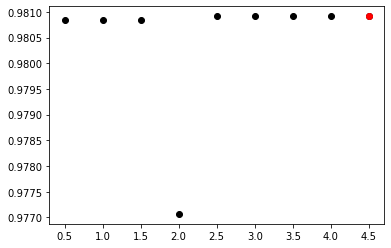

In [66]:

best_c = 0
bestlr_score = 0
fig, ax = plt.subplots(1)
for c in np.arange(0.5, 5, 0.5): # iterativly find best parameter
    MLR = LogisticRegression(multi_class='multinomial',max_iter = 10000, C = c)
    cv_score = cross_val_score(MLR, X_train[Features], y_train, cv=5).mean()#find cv score on xtrain data of the
                                                                            #the features we found were best
    ax.scatter(c, cv_score, color = "black") # plot cv score for each c

 # gets the best model paramters and score
    if cv_score > bestlr_score:
        best_c = c
        bestlr_score = cv_score
        
ax.scatter(c, bestlr_score, color = "red")      

print("Best C: ", best_c)
print("Best score: ", bestlr_score)



For our multinomial regression model, we have determined that the best C is 2.5 that yields a mean cv score of .981

### Testing on Unseen Data 

In [127]:
MLR=LogisticRegression(multi_class='multinomial',C=best_c,max_iter=1000)
testModel(MLR)

The model's score on the training data is: 0.9961977186311787
The model's score on the test data is: 0.9848484848484849


This is pretty good

### Plotting the Decision Regions

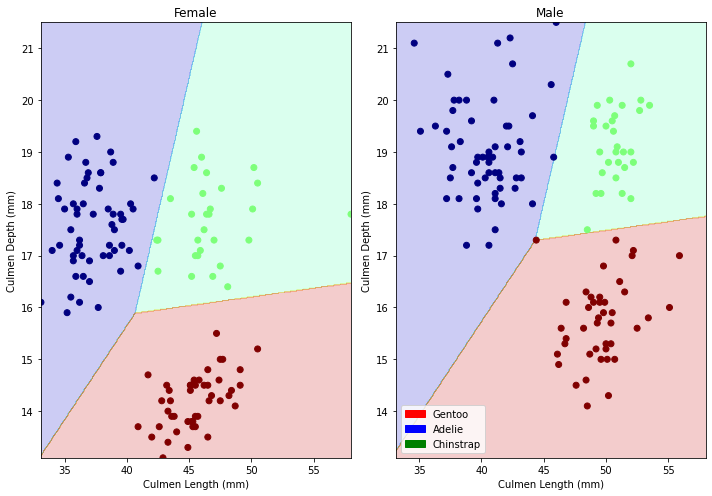

In [142]:

plot_regions(MLR, X_train[Features], y_train)
#needs legend and needs to highlight the regions


### Confusion Matrix Interpretation and Dicsussion of the Model's Mistakes

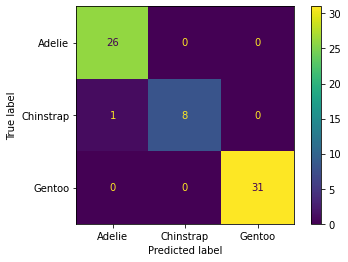

In [110]:
plot_confusion_matrix(MLR, X_test[Features], y_test,display_labels=["Adelie","Chinstrap","Gentoo"])  



#### Interpretation of the MLR Model's confusion maxtrix:



The MLR model predicts 26 Adelie penguins correctly, 8 chinstrap penguins correctly and 31 gentoo penguins correctly. 1 Chinstrap is misidentified as an Adelie penguin.The misidentification makes sense, as the there are penguins on the border of the decision boundary of Adelie and Chinstrap. 

***

## Random Forests

Random forests are made up of numerous individual decision trees. Each decision tree generates its own prediction, and the prediction with the highest number of votes becomes the model's prediction.

### Choosing Complexity Parameters 


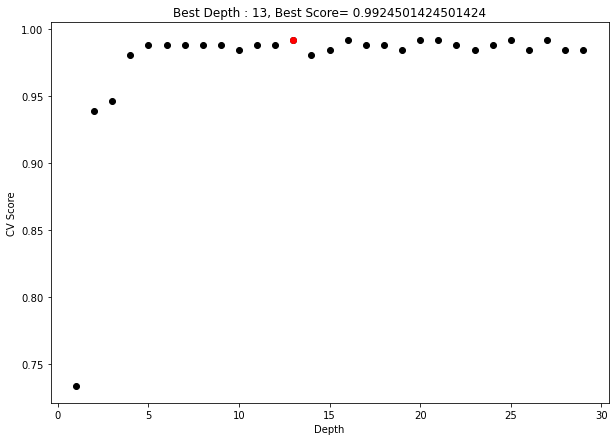

In [22]:
fig, ax = plt.subplots(1,figsize=(10,7))
bs = 0
for d in range(1,30):# iterativly find best parameter
    rf = RandomForestClassifier(max_depth=d)
    cvScore = cross_val_score(rf, X_train[Features], y_train, cv=10).mean()#find cv score on xtrain data of the
                                                                            #the features we found were best
    ax.scatter(d, cvScore, color = "black")
    #stores the best score and depth of the tree
    if cvScore > bs:
        bDepth = d
        bs = cvScore

ax.scatter(bDepth, bs, color = "red")      
l = ax.set(title = "Best Depth : " + str(bDepth)+", Best Score= "+str(bs), xlabel = "Depth", ylabel = "CV Score")

For our random forest model, we have determined that the best depth is 2.5 that yields a mean cv score of .992

### Testing on Unseen Data


In [23]:
randomF = RandomForestClassifier(max_depth=bDepth)
testModel(randomF)

The model's score on the training data is: 1.0
The model's score on the test data is: 0.9848484848484849


This is pretty good

### Plotting the Decision Regions


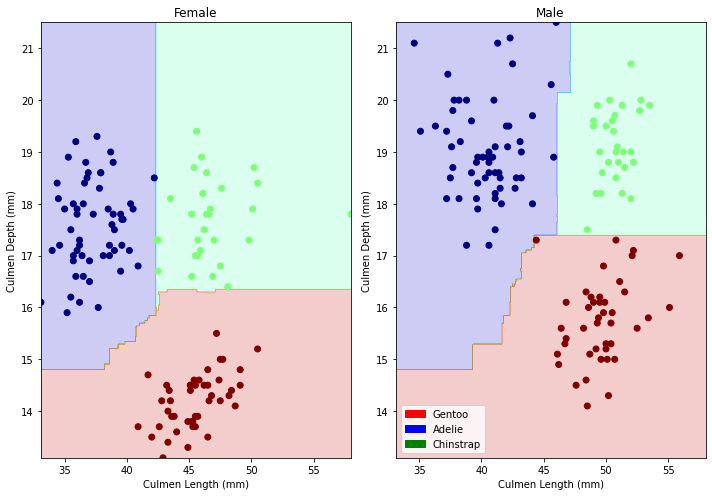

In [143]:
plot_regions(randomF, X_train[Features], y_train)
#needs legend and needs to highlight the regions

### Confusion Matrix Interpretation and Dicsussion of the Model's Mistakes

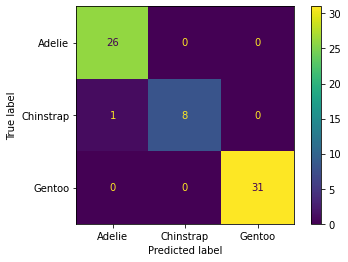

In [117]:
plot_confusion_matrix(randomF, X_test[Features], y_test,display_labels=["Adelie","Chinstrap","Gentoo"]) 


#### Interpretation of the Random Forest Model's confusion maxtrix:

The Random Forest model predicts 26 Adelie penguins correctly, 8 chinstrap penguins correctly and 31 gentoo penguins correctly. 1 Chinstrap is misidentified as an Adelie penguin.The misidentification makes sense, as the there are penguins on the border of the decision boundary of Adelie and Chinstrap. Compared to the MLR model, this model performs exactly the same and even misidentifies the a similar penguin incorrectly. This also becuase there are penguins on the  border of the decision boundary of Adelie and Chinstrap in the MLR model.

***

## Support-Vector Machines (SVM) 

In terms of the decision region, Support Vector Machines generate "sections" that divide the dataset and develop more curvier boundaries. This can help differentiate between species in a much more robust manner, as well as fine-tune individual outliers that may emerge from the data.

### Chosing Complexity Parameters

Best Gamma:  1.0
Best score:  0.9770655270655271


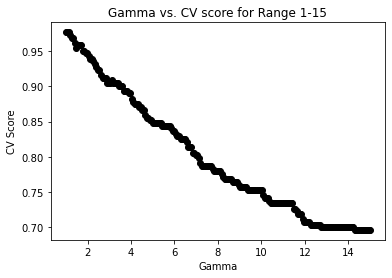

In [29]:
from sklearn import svm
fig, ax = plt.subplots(1)
best_score = 0
best_gamma = 0
for d in np.linspace(1, 15, 200):#iterativly finds the best gamma value 
    SVM = svm.SVC(gamma = d)
    cv_score = cross_val_score(SVM, X_train[Features], y_train, cv = 10).mean()#find cv score on xtrain data of the
                                                                            #the features we found were best
    ax.scatter(d, cv_score, color = 'black')
    
    # gets the best model paramters and score
    if cv_score > best_score:
            best_gamma = d
            best_score = cv_score
l = ax.set(title = "Gamma vs. CV score for Range 1-15", xlabel = "Gamma", ylabel = "CV Score", alpha = 0.5)
print("Best Gamma: ", str(best_gamma))
print("Best score: ", str(best_score))

For our SVM model, we have determined that the best gamma is 1.0 that yields a mean cv score of .977

### Testing on Unseen Data


In [31]:
SVM=svm.SVC(gamma=best_gamma)
testModel(SVM)

The model's score on the training data is: 1.0
The model's score on the test data is: 0.9545454545454546


This may be a sign of overfitting, the model still performs relatively well though

### Plotting the Decision Regions


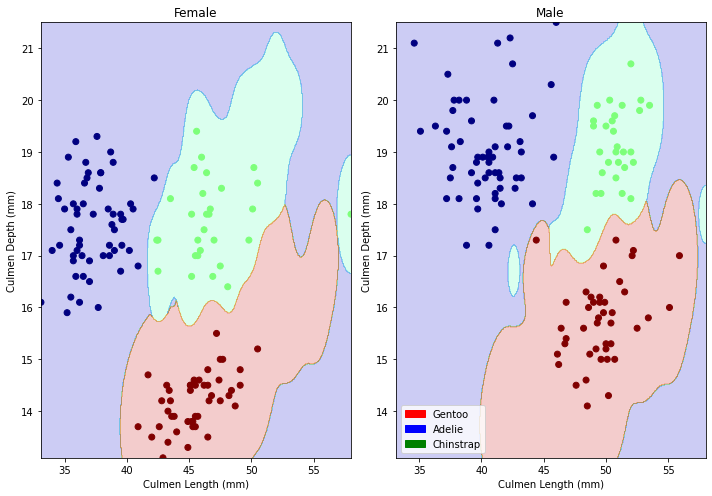

In [144]:
plot_regions(SVM, X_train[Features], y_train)
#needs legend and needs to highlight the regions

The shape of the boundaries seem to be different, we will explore this below.

### Confusion Matrix Interpretation and Dicsussion of the Model's Mistakes

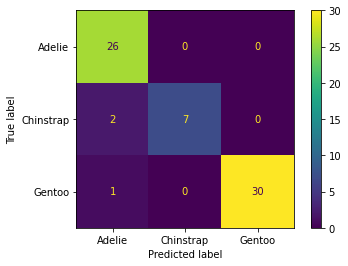

In [116]:
plot_confusion_matrix(SVM, X_test[Features], y_test,display_labels=["Adelie","Chinstrap","Gentoo"])  

#### Interpretation of the SVM Model's confusion maxtrix:

The SVM model predicts 26 Adelie penguins correctly, 7 chinstrap penguins correctly and 30 gentoo penguins correctly. 2 Chinstraps are misidentified as Adelie penguins and 1 Gentoo penguin is misidentified as an Adelie penguin. This model performs, on average, worse than the other two models which both performed the same and both misidentified 1 similar penguin.  The decision boundaries are very different from the other two models' decsion boundaries and that may have an affect on the model's performance. There do not appear to be any clear "border cases" as the other models, but the more curvy and decsion regions might by a sign of overfitting.This model misidentified a total of 3 penguins, but on average still performed pretty well.

# Discussion




Analysis of models: According to our analysis using the features Culmen Length, Culmen Depth and Sex, out of the 3 models we have chosen to use, the Random Forest Model and Multinomial Logistic Regression Model performed similarly, both of which showed an accuracy of 98.48%. Both models performed marginally better than the Support Vector Machines Model(SVM), which displayed and accuracy of 95.4%. The SVM model may have been overfitted and 

Both the Random Forest Model and Multinomial Logistic Regression Model had a high accuracy score of approximately 98.48% when dealing with the test data.


Possible Improvements: According to the cross-validation scores, we found that the scores were the lowest when the features Sex, Culmen Length and Culmen Depth are left out. Thus, this could potentially mean that biological aspects of penguins lead to better estimations of penguins for the machine learning models. Therefore, one possible way to improve the model would be to include more features that pertain to the biological information of penguins. For example, data such as bodily measurements, behavioural patterns(to be encoded in a numerical way) or physical attributes of the penguins may improve the model.

Furthermore, if there is a bigger sample size on the dataset, there would be more data available to allow the machine learning models to derive more accurate results, and thus would be more robust in the prediction of penguin species. If we could use a couple more paramters such as Island and possibly do a feature selection for each model specifically we could get better results. 